## Comparing the socio-economic factors like GDP and Population with the solar energy Conumsption 
We compare the trends with the solar energy consumption in india 
The dataset has information about various countries and differnet resources annually

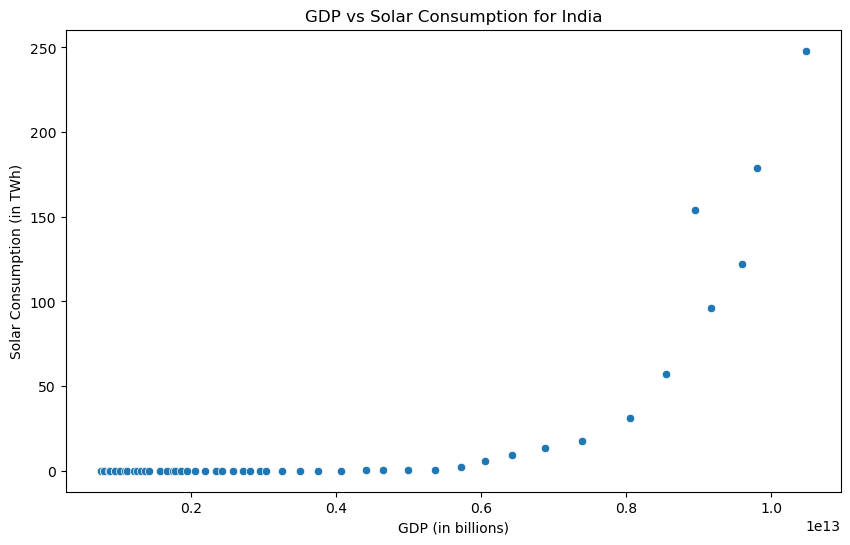

                        gdp  solar_consumption
gdp                1.000000           0.756206
solar_consumption  0.756206           1.000000


In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('owid-energy.csv')

india_data = df[df['country'] == 'India']

cleaned_data = india_data.dropna(subset=['solar_consumption'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_data, x='gdp', y='solar_consumption')
plt.title('GDP vs Solar Consumption for India')
plt.xlabel('GDP (in billions)')
plt.ylabel('Solar Consumption (in TWh)')
plt.show()

# Checking correlation
correlation = cleaned_data[['gdp', 'solar_consumption']].corr()
print(correlation)


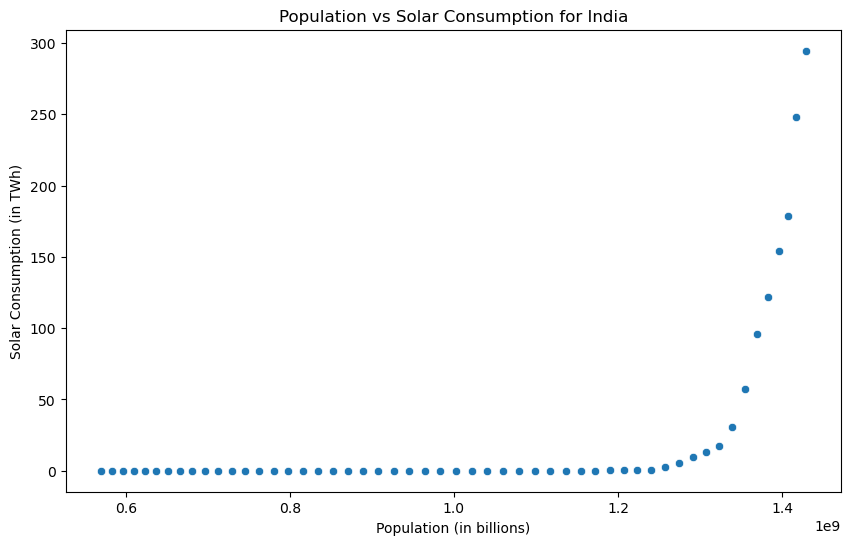

                   population  solar_consumption
population           1.000000           0.555022
solar_consumption    0.555022           1.000000


In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('owid-energy.csv')

india_data = df[df['country'] == 'India']
cleaned_data = india_data.dropna(subset=['solar_consumption']) #NaN DATA is removed

plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_data, x='population', y='solar_consumption')
plt.title('Population vs Solar Consumption for India')
plt.xlabel('Population (in billions)')
plt.ylabel('Solar Consumption (in TWh)')
plt.show()

# Checking correlation
correlation = cleaned_data[['population', 'solar_consumption']].corr()
print(correlation)


### Solar energy consumption statewise 
The total data was provided for the year 2022-2023

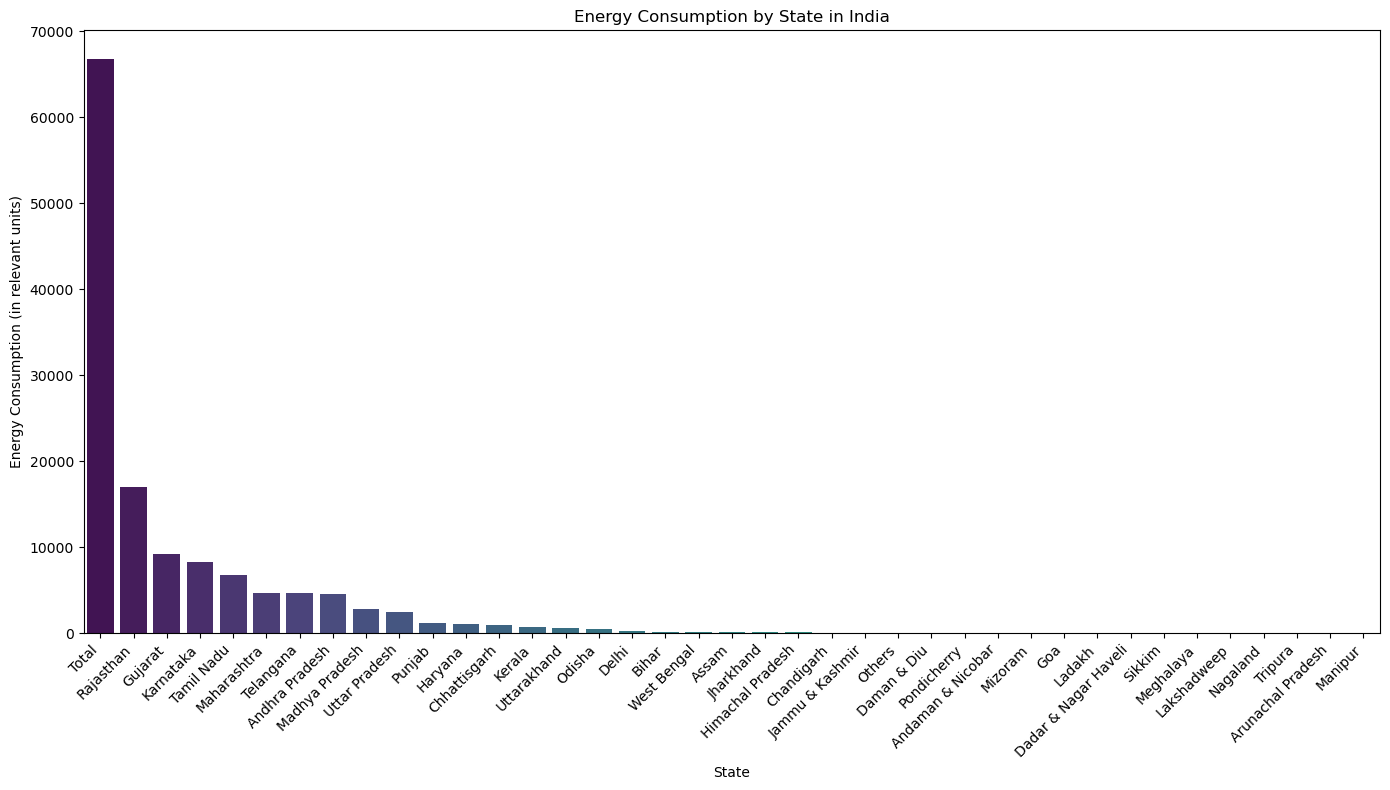

In [63]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


data =pd.read_csv('State.csv')
statewise_data = data[['States', 'Capacity(MW)']]  

statewise_data = statewise_data.sort_values(by='Capacity(MW)', ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(data=statewise_data, x='States',y='Capacity(MW)',  hue='States', palette='viridis', legend=False)
plt.title('Energy Consumption by State in India')
plt.xlabel('State')
plt.ylabel('Energy Consumption (in relevant units)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()





### Merging the 4 datasets into an annual dataset

Merge the datasets

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

#MERGE YEAR WISE
dataset_1=pd.read_csv('owid-energy.csv')
gov=pd.read_csv('GovRen.csv')
energy=pd.read_csv('EnergyCountry.csv')
cost=pd.read_csv('CostofSolarPV.csv')

dataset_1.rename(columns={'year': 'Year'}, inplace=True)

dataset_1['Year'] = dataset_1['Year'].astype(str)
gov['Year'] = gov['Year'].astype(str)
energy['Year'] = energy['Year'].astype(str)
cost['Year'] = cost['Year'].astype(str)

#merge the first three dataset as it contains energy 

dataset1=dataset_1[dataset_1['country']=='India'][['Year','solar_consumption']]
dataset2=gov[['Year', 'Solar Power']] 
merged_data = pd.merge(dataset1, dataset2, on='Year', how='inner')

dataset3=energy[energy['Country']=='India'][['Year','LCOE (USD/kWh)']]
merged_data = pd.merge(merged_data, dataset3, on='Year', how='inner')

dataset4=cost[['Year', 'India']]
data = pd.merge(merged_data, dataset4, on='Year', how='inner')
data.rename(columns={'India': 'Prices(Avg)'}, inplace=True)
data.rename(columns={'LCOE (USD/kWh)': 'LCOE'}, inplace=True)
data.rename(columns={'Solar Power': 'Solar Power generated'}, inplace=True)
print(data)

   Year  solar_consumption  Solar Power generated    LCOE  Prices(Avg)
0  2014             13.299                2821.91  0.1323         2140
1  2015             17.683                1171.62  0.0866         1458
2  2016             30.936                3130.36  0.0817         1255
3  2017             57.336                5658.63  0.0746         1252
4  2018             96.123                9563.69  0.0541          889
5  2019            121.960                6750.97  0.0428          694
6  2020            154.120                6510.06  0.0406          661
7  2021            178.734                5628.80  0.0367          631
8  2022            248.090               12760.50  0.0374          640


#### Solar consumption Solar power generated
Comapring the power generated and consumption per year from 2014-2022

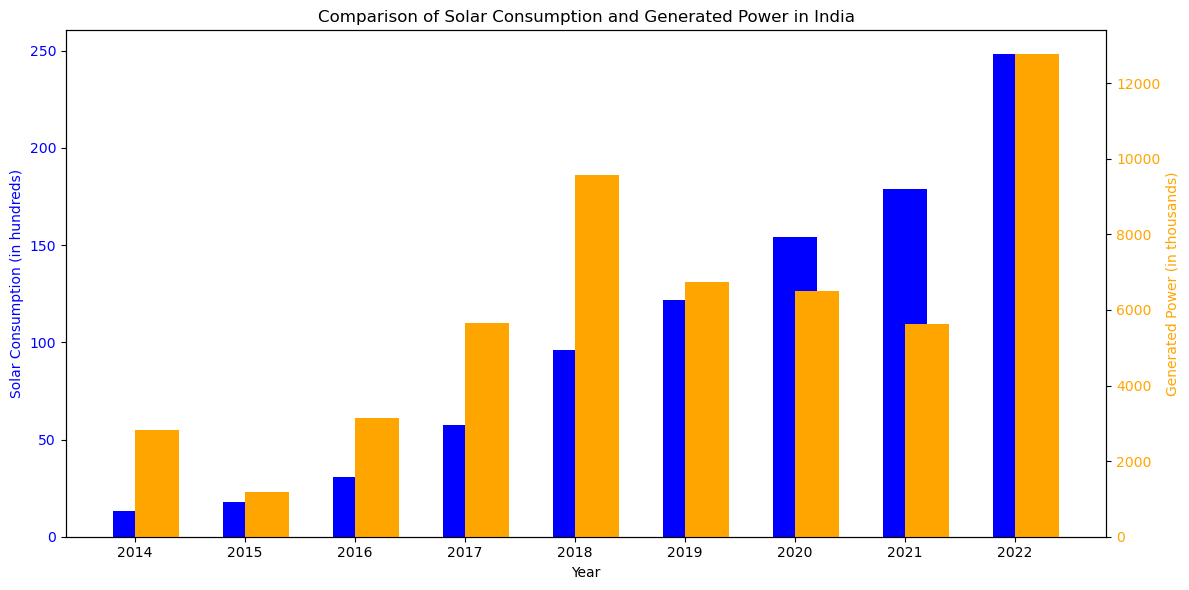

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

#for consumed power
ax1.bar(data['Year'], data['solar_consumption'], color='blue', label='Solar Consumption', width=0.4, align='center')
ax1.set_ylabel('Solar Consumption (in hundreds)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
#for generated power
ax2 = ax1.twinx()  
ax2.bar(data['Year'], data['Solar Power generated'], color='orange', label='Generated Power', width=0.4, align='edge')
ax2.set_ylabel('Generated Power (in thousands)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Comparison of Solar Consumption and Generated Power in India')
ax1.set_xlabel('Year')
plt.xticks(rotation=45)
fig.tight_layout()  
plt.show()




## Comparing consumption and proces of solar energy

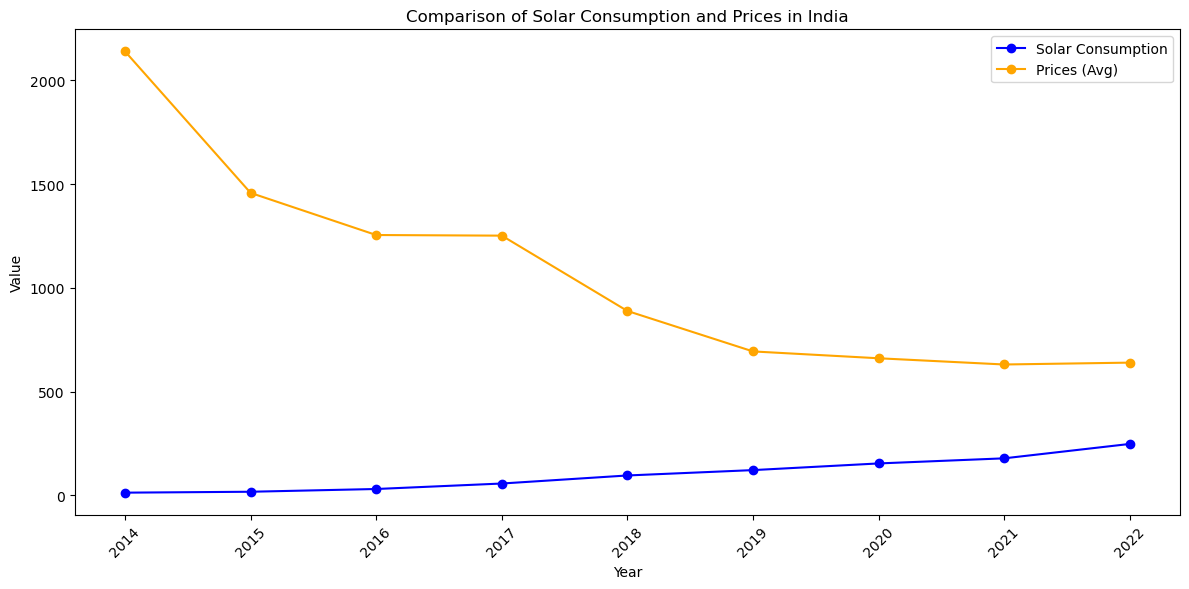

In [73]:
#plotting  solar consumption and prices
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['solar_consumption'], marker='o', label='Solar Consumption', color='blue')
plt.plot(data['Year'], data['Prices(Avg)'], marker='o', label='Prices (Avg)', color='orange')
plt.title('Comparison of Solar Consumption and Prices in India')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## LCOE vs Power generated

The Levelized Cost of Energy (LCOE) is basically the average cost to produce electricity from a generator over its entire lifespan. It includes all costs—like building, fuel, and maintenance—spread out over the years, giving a clear idea of how much each unit of energy really costs to produce.

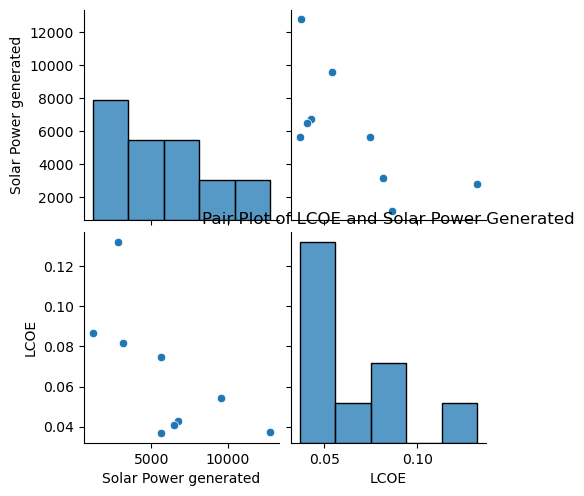

In [77]:
# plotting lcoe and solar power generated 
import seaborn as sns



sns.pairplot(data[['Solar Power generated', 'LCOE']])
plt.title('Pair Plot of LCOE and Solar Power Generated')
plt.show()

## Predicting the prices of the solar generators through different machine learning models

## Random Forest Regressor

(9, 3) (7, 3) (2, 3)
Random Forest Regression MSE: 19968.08682857142
Random Forest Regression R²: 0.919591297099477


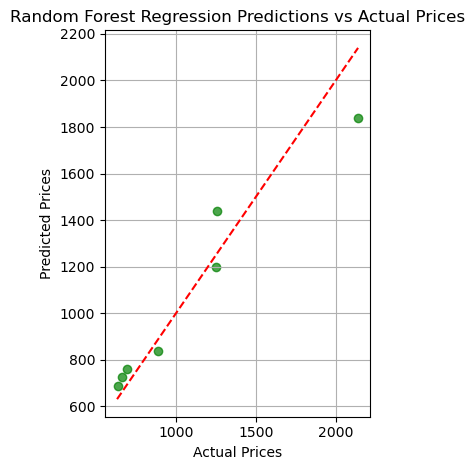

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


X = data[['solar_consumption', 'Solar Power generated', 'LCOE']]  
y = data['Prices(Avg)'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X.shape,X_train.shape,X_test.shape)

rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_model.fit(X_train, y_train)

rfr_predictions = rfr_model.predict(X_train)
  
print("Random Forest Regression MSE:", mean_squared_error(y_train, rfr_predictions))
print("Random Forest Regression R²:", r2_score(y_train, rfr_predictions))

plt.subplot(1, 2, 2)
plt.scatter(y_train, rfr_predictions, color='green', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.title('Random Forest Regression Predictions vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid()

plt.tight_layout()
plt.show()


on testing data

In [84]:
data_pred=rfr_model.predict(X_test)
print(data_pred)

[ 817.78 1695.01]


Random Forest Regression MSE: 45530.25424999999
Random Forest Regression R²: 0.7337135623727025


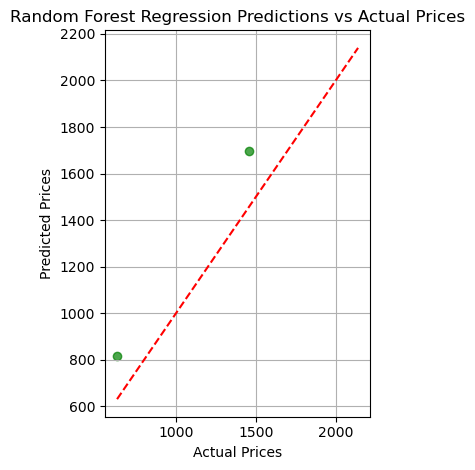

In [86]:
  
print("Random Forest Regression MSE:", mean_squared_error(y_test, data_pred))
print("Random Forest Regression R²:", r2_score(y_test, data_pred))

plt.subplot(1, 2, 2)
plt.scatter(y_test, data_pred, color='green', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.title('Random Forest Regression Predictions vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid()

plt.tight_layout()
plt.show()


## Linear Regression

Linear Regression MSE: 671.5420733784277
Linear Regression R²: 0.9972957936567952


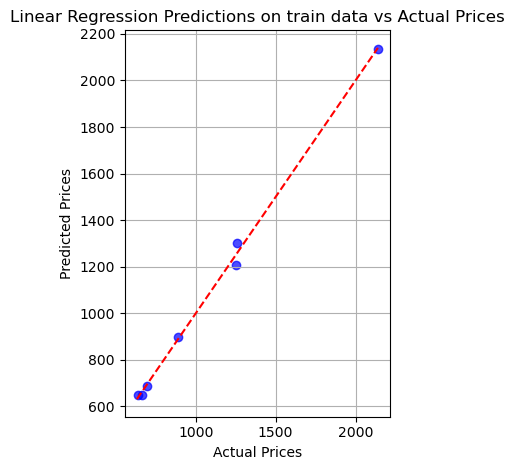

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_train)
print("Linear Regression MSE:", mean_squared_error(y_train, lr_predictions))
print("Linear Regression R²:", r2_score(y_train, lr_predictions))


plt.subplot(1, 2, 1)
plt.scatter(y_train, lr_predictions, color='blue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.title('Linear Regression Predictions on train data vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid()
plt.tight_layout()
plt.show()

[ 577.33075373 1365.08834937]
Linear Regression MSE: 5756.481408756972
Linear Regression R²: 0.9663328713433297


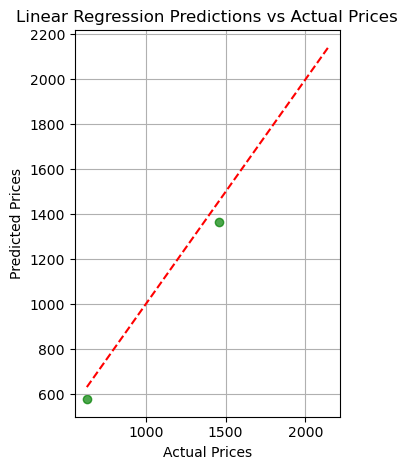

In [91]:
data_pred=lr_model.predict(X_test)
print(data_pred)
print("Linear Regression MSE:", mean_squared_error(y_test, data_pred))
print("Linear Regression R²:", r2_score(y_test, data_pred))

plt.subplot(1, 2, 2)
plt.scatter(y_test, data_pred, color='green', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.title('Linear Regression Predictions vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid()
plt.tight_layout()
plt.show()

### Prediction of future prices with linear regression

Linear regression performed well out of the two models so we are using it to perform the prediction

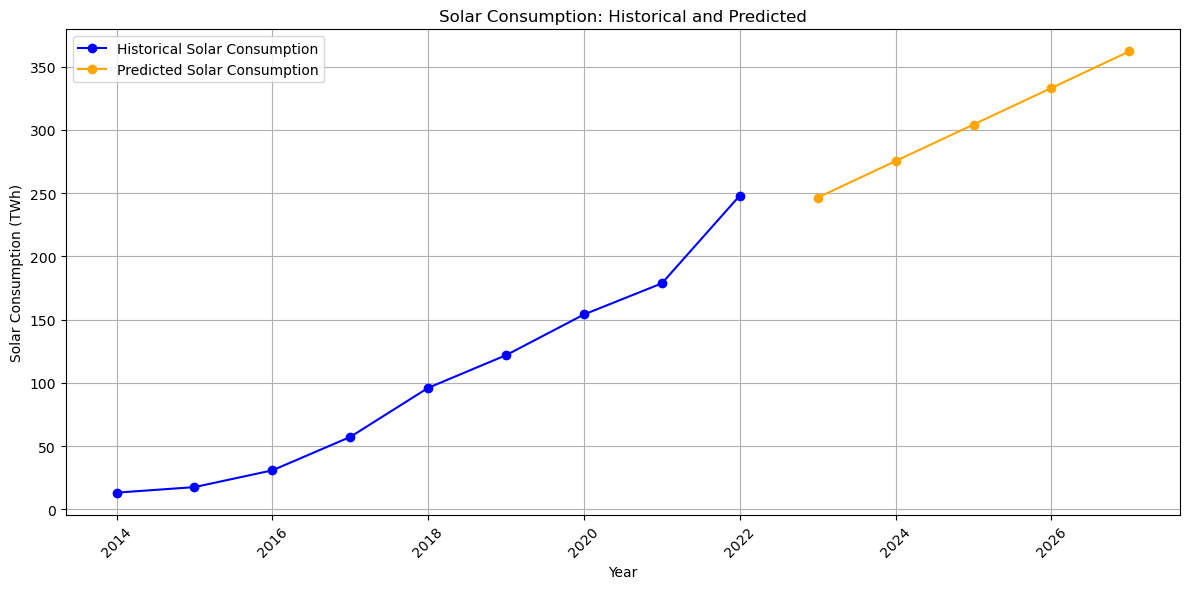

In [94]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data['Year'] = data['Year'].astype(int)

X = data['Year'].values.reshape(-1, 1)  
y = data['solar_consumption'].values 

model = LinearRegression()
model.fit(X, y)

current_year = data['Year'].max()
future_years = np.array(range(current_year + 1, current_year + 6)).reshape(-1, 1)
future_predictions = model.predict(future_years)
future_data = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Solar Consumption': future_predictions})

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['solar_consumption'], marker='o', label='Historical Solar Consumption', color='blue')
plt.plot(future_data['Year'], future_data['Predicted Solar Consumption'], marker='o', label='Predicted Solar Consumption', color='orange')
plt.title('Solar Consumption: Historical and Predicted')
plt.xlabel('Year')
plt.ylabel('Solar Consumption (TWh)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Prediction of the solar consumption

Predicted Solar Consumption for Future Years:
   Year  Predicted Solar Consumption
0  2023                   246.473639
1  2024                   275.362122
2  2025                   304.250606
3  2026                   333.139089
4  2027                   362.027572


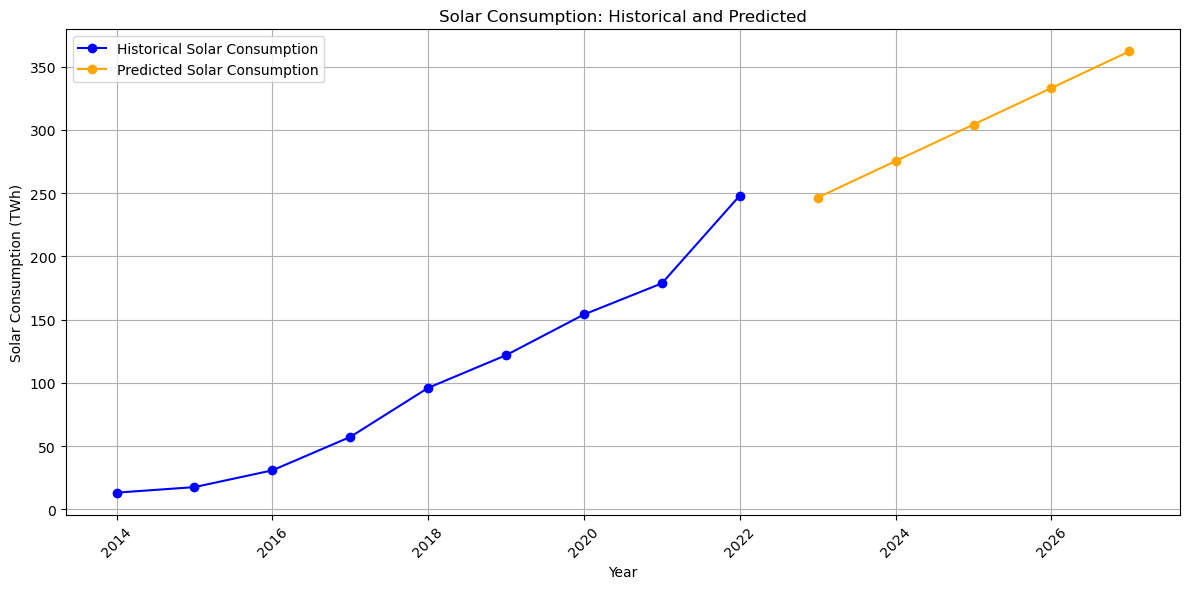

In [99]:
current_year = data['Year'].max()
future_years = np.array(range(current_year + 1, current_year + 6)).reshape(-1, 1)

# Predict future solar consumption
future_predictions = model.predict(future_years)
future_data = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Solar Consumption': future_predictions})

# Print actual predicted values for each future year
print("Predicted Solar Consumption for Future Years:")
print(future_data)

# Plotting both historical and predicted solar consumption data
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['solar_consumption'], marker='o', label='Historical Solar Consumption', color='blue')
plt.plot(future_data['Year'], future_data['Predicted Solar Consumption'], marker='o', label='Predicted Solar Consumption', color='orange')
plt.title('Solar Consumption: Historical and Predicted')
plt.xlabel('Year')
plt.ylabel('Solar Consumption (TWh)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()